In [62]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [50]:
df=pd.read_csv('Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [17]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [18]:
df.sample()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
290,Prof,A,33,7,Male,174500


In [19]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [21]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [22]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [23]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

yrs.since.phd       AxesSubplot(0.125,0.71587;0.110714x0.16413)
yrs.service      AxesSubplot(0.257857,0.71587;0.110714x0.16413)
salary           AxesSubplot(0.390714,0.71587;0.110714x0.16413)
dtype: object

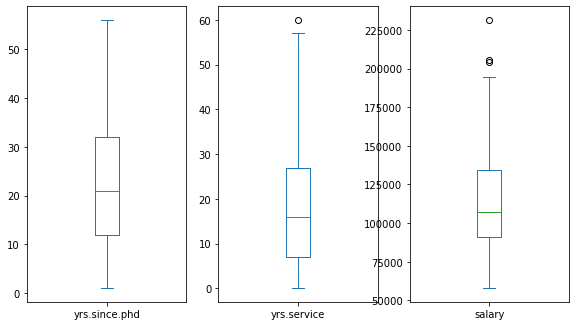

In [25]:
df.plot(kind='box',figsize=(20,25),layout=(4,6),subplots=True)

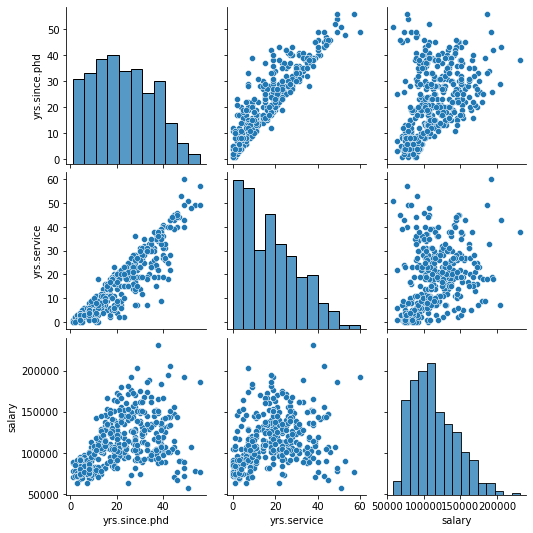

In [26]:
sns.pairplot(df)

<AxesSubplot:>

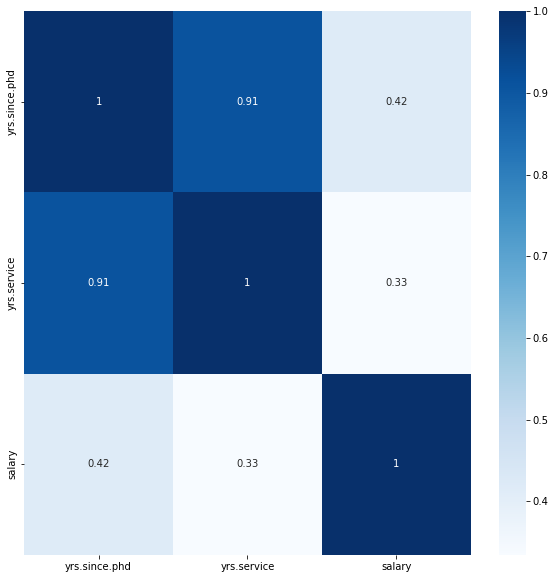

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [28]:
df1=df.iloc[:,2:]
df1

,yrs.since.phd,yrs.service,sex,salary
0,19,18,Male,139750
1,20,16,Male,173200
2,4,3,Male,79750
3,45,39,Male,115000
4,40,41,Male,141500
...,...,...,...,...
392,33,30,Male,103106
393,31,19,Male,150564
394,42,25,Male,101738
395,25,15,Male,95329


In [31]:
df2=df1.drop(['sex'],axis=1)
df2

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


In [32]:
z=np.abs(zscore(df2))
z

,yrs.since.phd,yrs.service,salary
0,0.257550,0.029669,0.860919
1,0.179854,0.124300,1.966672
2,1.422982,1.125098,1.122495
3,1.762533,1.646343,0.042760
4,1.374055,1.800312,0.918768
...,...,...,...
392,0.830187,0.953483,0.350418
393,0.674796,0.106654,1.218396
394,1.529446,0.568560,0.395640
395,0.208623,0.201284,0.607502


In [33]:
threshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([2, 1, 1, 2], dtype=int64))


In [34]:
df2_new=df2[(z<3).all(axis=1)]
df2_new

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


In [35]:
df2.shape

(397, 3)

In [36]:
df2_new.shape

(393, 3)

In [37]:
df2_new.skew()

yrs.since.phd    0.288531
yrs.service      0.588861
salary           0.581098
dtype: float64

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

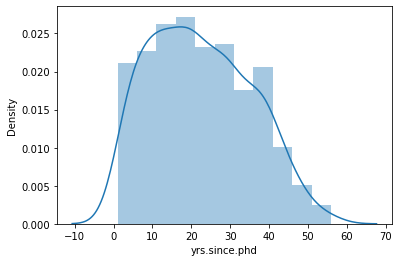

In [38]:
sns.distplot(df['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

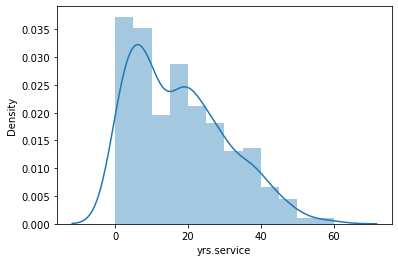

In [39]:
sns.distplot(df['yrs.service'])

<AxesSubplot:xlabel='salary', ylabel='Density'>

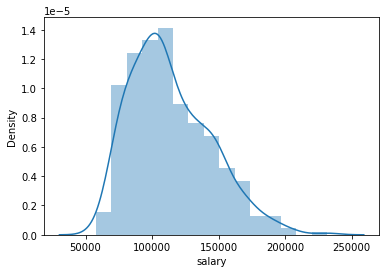

In [40]:
sns.distplot(df['salary'])

In [43]:
x=df2_new.iloc[:,:-1]
x

,yrs.since.phd,yrs.service
0,19,18
1,20,16
2,4,3
3,45,39
4,40,41
...,...,...
392,33,30
393,31,19
394,42,25
395,25,15


In [45]:
y=df2_new.iloc[:,-1]
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 393, dtype: int64

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=45)

In [53]:
x_train.shape

(314, 2)

In [54]:
x_test.shape

(79, 2)

In [55]:
y_train.shape

(314,)

In [56]:
y_test.shape

(79,)

In [68]:
lr=LogisticRegression()

In [69]:
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [70]:
print('salarys',y_test)

salarys 161    176500
141     81500
181    141136
259     92550
331    116518
        ...  
77     193000
387    109305
180    142467
385    114330
150    128148
Name: salary, Length: 79, dtype: int64
